# Table of Contents
 <p><div class="lev2 toc-item"><a href="#現実的なマシンの加速性能" data-toc-modified-id="現実的なマシンの加速性能-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>現実的なマシンの加速性能</a></div><div class="lev2 toc-item"><a href="#課題" data-toc-modified-id="課題-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>課題</a></div><div class="lev3 toc-item"><a href="#ヒント" data-toc-modified-id="ヒント-021"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>ヒント</a></div><div class="lev2 toc-item"><a href="#課題4" data-toc-modified-id="課題4-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>課題4</a></div><div class="lev1 toc-item"><a href="#課題4:-fitting" data-toc-modified-id="課題4:-fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>課題4: fitting</a></div><div class="lev1 toc-item"><a href="#課題5:" data-toc-modified-id="課題5:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>課題5:</a></div><div class="lev2 toc-item"><a href="#空気抵抗なしの場合" data-toc-modified-id="空気抵抗なしの場合-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>空気抵抗なしの場合</a></div><div class="lev3 toc-item"><a href="#課題4のfittingで求めた加速度" data-toc-modified-id="課題4のfittingで求めた加速度-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>課題4のfittingで求めた加速度</a></div><div class="lev2 toc-item"><a href="#空気抵抗が小さい場合(cc=0.1)" data-toc-modified-id="空気抵抗が小さい場合(cc=0.1)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>空気抵抗が小さい場合(cc=0.1)</a></div><div class="lev2 toc-item"><a href="#空気抵抗が大きい場合(cc=0.5)" data-toc-modified-id="空気抵抗が大きい場合(cc=0.5)-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>空気抵抗が大きい場合(cc=0.5)</a></div><div class="lev1 toc-item"><a href="#馬力換算，実データの再現" data-toc-modified-id="馬力換算，実データの再現-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>馬力換算，実データの再現</a></div><div class="lev1 toc-item"><a href="#訂正した問題" data-toc-modified-id="訂正した問題-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>訂正した問題</a></div><div class="lev2 toc-item"><a href="#コメント" data-toc-modified-id="コメント-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>コメント</a></div>

<div style="text-align: center;">
  <font size="5">スーパーカーのシミュレーション</font>
</div>
<div style="text-align: right;">
  <font size="3">cc by Shigeto R. Nishitani</font>
</div>


* /Users/bob/Desktop/maple_ode/python_ode.ipynb
* origin	git@github.com:daddygongon/maple_ode.git (fetch)

## 現実的なマシンの加速性能
## 課題
課題4で計測したのと同じマシンを使って，Euler法による
シミュレーションから空気抵抗と馬力を予測する．
空気抵抗をいくつか現実的な程度に設定してシミュレーションを行え．
馬力がどの程度変化するかを報告せよ．
現実的なゼロヨンのタイムとその時の時速を報告せよ．

### ヒント
* 課題4と課題5のEuler法に空気抵抗を加えてシミュレーションを行い，
* 図表にまとめてA4 2枚程度のレポートに仕上げよ．
* 厳密にフィッティングするとおかしくなるので，目視確認でよい．

## 課題4
次のデータを示す自動車の加速度$a$を                                                                                      
$d = a t^2 (y = a x^2)$にフィットして
求めよ．

|time[sec] | dist[m] 
|---:|---:
|0 | 0 
|0.751 | 10 
|1.113 | 20 
|1.504 | 40
* 自動車の走行距離データ．

100[m]何秒で通過するか？　小数点以下2桁程度で答えよ．


# 課題4: fitting

データにfitさせると次のようになる．


[ 17.34679]


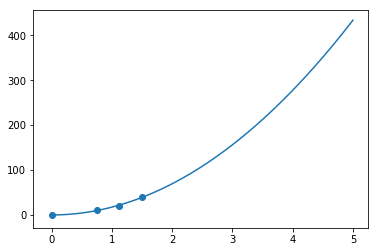

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

np.set_printoptions(precision=5, suppress=True)

def fitting_func(t,a):
    d =a*(t**2)
    return d

t =np.array([0, 0.751, 1.113, 1.504])
d = np.array([0, 10, 20, 40])

param, cov = curve_fit(fitting_func, t, d)
x = np.arange(0,5, 0.0001)
print(param)
fit_y = fitting_func(x, *param)
plt.plot(x, fit_y)
plt.scatter(t,d)
plt.show()

このマシンの加速度は17.35[m/sec^2]となっており，グラフの目視によると2.4秒ほどで100mを通過し，4.8秒ほどで400mを通過している．その時の速度は299km/hで，ゼロヨン時の速度は600km/hであることが次の通り確認できる．

In [3]:
from sympy import *
t0=symbols('t0')
a0 = param
eq1=a0*t0*t0
s0=solve(eq1-100, t0)
s1=solve(eq1-400, t0)

print(s0,s1)

print(2*a0*2.4*60*60/1000)
print(2*a0*4.8*60*60/1000)

[(-2.40099080206130,), (2.40099080206130,)] [(-4.80198160412261,), (4.80198160412261,)]
[ 299.75245]
[ 599.50491]


# 課題5: 
## 空気抵抗なしの場合
### 課題4のfittingで求めた加速度
まず空気抵抗なしでのマシンの運動を微分方程式で立ててみる．
空気抵抗なしなので，cc=0である．また，物体の落下ではg=9.8としていたが，
今は，加速度としてaaとし，向きを逆にしてeuler法に入れておく．

加速度のaaは，先ほどの課題4から17.35を初期値にして様子をみる．

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def euler(x0, v0):
    v1 = v0 + (-cc * v0 + aa) * dt
    x1 = x0 + v0 * dt
    return x1,v1

def my_plot(xx, vv, tt):
    t =np.array([0, 0.751, 1.113, 1.504])
    d = np.array([0, 10, 20, 40])

    plt.plot(tt,xx,color='b')
    plt.plot(tt,vv,color='r')
    plt.scatter(t,d,color='k')

    plt.grid()
    plt.show()

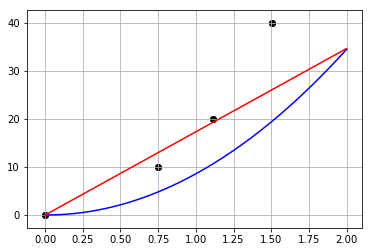

In [6]:
aa, dt, cc = a0, 0.01, 0.0
tt, xx, vv =[0.0],[0.0],[0.0]
time = 0.0

for i in range(0, 200):
    time += dt
    x, v = euler(xx[-1], vv[-1])
    tt.append(time)
    xx.append(x)
    vv.append(v)

plt.scatter(t,d)
my_plot(xx,vv,tt)

全く合ってない．そこで，aaをいくつか変えてプロットしてみた．

その結果，a0(課題4で求めたfitting parametersの値)を2倍すると，データに一致する．
これは，
$$
dist = \int v dt = \int a t dt = \frac{1}{2}at^2
$$

における係数から出てきたものと考えられる．

すなわち，課題4のfittingでは実データに対して加速度がfittingされるが，
euler法では微分方程式に基づいて逐次的に解かれていくため，
方程式の係数に差異が出る．

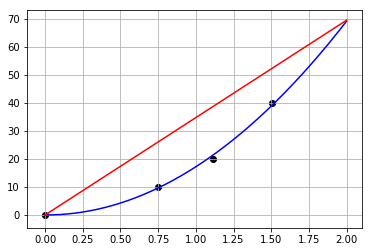

In [14]:
def super_machine(r_max):
    tt, xx, vv =[0.0],[0.0],[0.0]
    time = 0.0
    for i in range(0, r_max):
        time += dt
        x, v = euler(xx[-1], vv[-1])
        tt.append(time)
        xx.append(x)
        vv.append(v)
    return(xx,vv,tt)

aa, dt, cc = a0*2, 0.01, 0.0
xx,vv,tt = super_machine(200)
my_plot(xx,vv,tt)

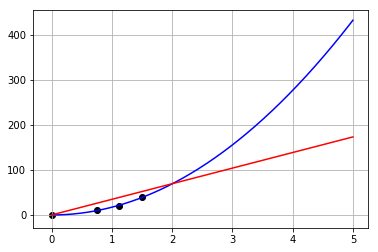

In [15]:
aa, dt, cc = a0*2, 0.01, 0.0
xx,vv,tt = super_machine(500)
my_plot(xx,vv,tt)

空気抵抗のない場合のfitting結果は上の通り．綺麗に加速して，約4.8秒で400mに到達する．

## 空気抵抗が小さい場合(cc=0.1)

空気抵抗が0.1ある場合では，馬力はそれほどあげなくてもほぼおなじfitが可能．ただし，高速での
伸びは抑えられて，ゼロヨンまで5.1秒ほどかかる．


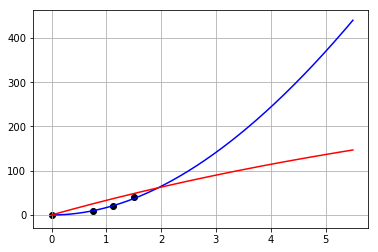

In [16]:
aa, dt, cc = a0*2, 0.01, 0.1
xx,vv,tt = super_machine(550)
my_plot(xx,vv,tt)

## 空気抵抗が大きい場合(cc=0.5)
さらに空気抵抗が0.5まで大きくすると，$aa=2a0$ではデータに合わず，
より大きな加速度(2.4a0)が要求される．


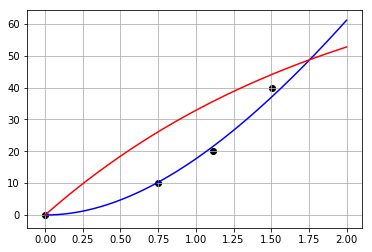

In [11]:
aa, dt, cc = a0*2.4, 0.01, 0.5
xx,vv,tt = super_machine(200)
my_plot(xx,vv,tt)

高速での空気抵抗による速度の低下はより顕著となり，ゼロヨンまで6.5秒ほどもかかることになる．

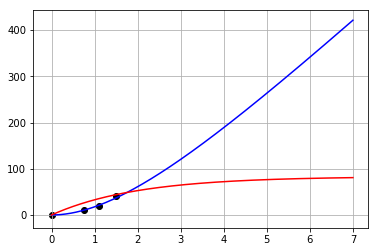

In [12]:
aa, dt, cc = a0*2.4, 0.01, 0.5
xx,vv,tt = super_machine(700)
my_plot(xx,vv,tt)

# 馬力換算，実データの再現

馬力換算は難しいですね．単純な計算式があるのかと
思ってたのですが，なさそうです．

そこで実データの再現性を確認しておきます．

今話題(2017/11発表)のテスラのロードスターは，

|スペック| |
|---:|---:
|0-60マイル(0-96km/h)加速|1.9秒
|最高速度|400km/h|
|ゼロヨン|8.9秒|

だそうです．でも，馬力のデータがなくって．．．

その前の世代のロードスターは詳細なデータがあって，

|スペック| |
|---:|---:
|0-60マイル(0-96km/h)加速|3.7秒
|車両重量|1,238kg
|最高出力|215kW(292馬力)

となっています．これを換算したかったのですが，
ちょっと無理みたい．ごめんなさい．

我々のsuper machineの馬力を下げて，空気抵抗も下げると
加速性能とゼロヨンは最新のロードスターのスペックを
再現できそうです．


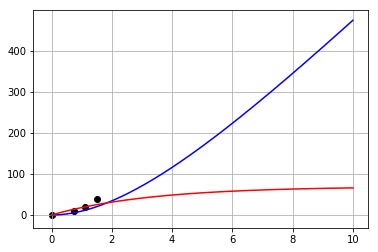

108.67011841024657 402.2828535082075 233.1173749704914


In [122]:
aa, dt, cc = a0*1.2, 0.01, 0.3
xx,vv,tt = super_machine(1000)
my_plot(xx,vv,tt)
print(vv[190]*3.6,xx[890],vv[900]*3.6)

上の設定(aa, cc = 1.2a0, 0.3)だと
108km/hまでで1.9秒，8.9秒で402m
となります．

でも，その時の時速は233km/hで，最高速度が抑えられてスペック通りにはなりません．
現実と理論との間にはまだギャップがあるようです．申し訳ない．

# 訂正した問題
課題4で計測したのと同じマシンを使って，Euler法による シミュレーションから空気抵抗と加速性能を予測する． 空気抵抗をいくつか現実的な程度に設定してシミュレーションを行え． 加速性能をどの程度に設定する必要があるかを推測せよ． その場合のゼロヨンのタイムとその時の時速を計算せよ．

## コメント
ここでやったような目視確認を，「現場合わせ」と呼んでいます．なにかを設計・制作する時には，ここで使った微分方程式のような経験的な式をたてて，部品の性能を示すパラメータをいじって，シミュレートを繰り返し，開発に必要となる部品性能や制御パラメータを割り出します．現場で必要となる知恵として心に留めておいてください．